In [1]:
%pylab inline
import numpy as np
import matplotlib as plt
from scipy.fftpack import fft
import cmath as cm

Populating the interactive namespace from numpy and matplotlib


/Users/daniellozano/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Mirando Transformadas 

In [2]:
X=np.linspace(-5,5,200)
Y=exp(-X**2)
YF=fft(Y)
freq=fftfreq(X.shape[-1])

(1+10j)
(1-10j)


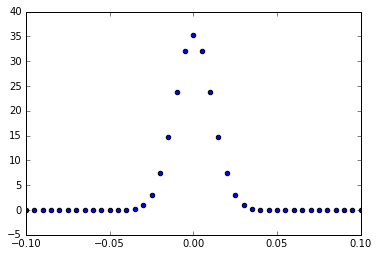

In [3]:
#plot(X,Y)
scatter(freq,abs(YF))
xlim(-.1,.1)
Z=complex(1,10)
print Z
print conjugate(Z)


## Problema de disipación

In [4]:
#Definiendo algunas variables
T=200
dt=1.0/T
Vop=1.8 # eV
hbarc=0.19733# ev Microm *c
m=0.511*10**6 # ev
d=20.8*10**-4 # Microm
c=2.998*10**14 # Microm/sec
im=complex(0,1) #definiendo i
print im,type(im)
gamma=[0,1*10**-2,5*10**-2] # se toman 3 gamas diferentes



1j <type 'complex'>


In [5]:
#Tiempo
t=linspace(0,3,T)

print hbarc/c

6.58205470314e-16


# Arriba de la Barrera

## $ w_{D}=\int_{0}^{\infty} dt\  \sqrt{ F(t)} \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{-i\omega t} w(E,V_{0}-\hbar \omega)$ 

### $ \sigma=\sqrt{\gamma^2+(4\gamma \Omega/\pi)^2} \quad ; \quad k=\frac{\sqrt{2mE}}{\hbar} \quad ; \quad \kappa=\frac{\sqrt{2m(E-V_{0})}}{\hbar} $

## $ w =-\frac{2 i k\kappa e^{-ikd}}{  (k^2 + \kappa^2)\cdot sin(\kappa d) \quad + \quad 2ik\kappa \cdot cos(\kappa d)  } $

In [6]:
omega=np.linspace((-Vop+0.1)/(hbarc/c),(Vop-0.1)/(hbarc/c),T)#omega de la transformada

OMEGA=100# Omega de corte siendo mucho mayor que los gammas tomados

E1=np.linspace(1+0.001 , 2 ,T) # Energias para arriba de la barrera E/Vop

trans1=zeros([len(E1),3]) #aqui seran guardadas las transformadas

for g in range(len(gamma)):
    
    sigma=sqrt(gamma[g]**2+(4.0*gamma[g]*OMEGA/pi)**2) #cambiando gamma
    
    FT=sqrt(2*sigma*t*exp(-(sigma-gamma[g])*t)) #definiendo la funcion sqrt(f(t))
    
    print gamma[g], "funcion F de t "
    
    for i in range(len(E1)): #variando la energia, punto por punto
        
        Vo=(Vop-omega*(hbarc/c))/Vop # definiendo el cambio de potencial sobre Vop
        
        k=sqrt(2.0*m*Vop*E1[i])/hbarc #multuplicar por Vop por no tener unidades
        
        kp=sqrt(2.0*m*Vop*(E1[i]-Vo))/hbarc #energia mayor a la energia del 
        
        w=-(2*im*k*kp*exp(-im*k*d)) / ( (k**2 + kp**2)*sin(kp*d) + 2*im*k*kp*cos(kp*d)  ) #creando la funcion para un cierto E
  
        W=fft(w)#haciendo la transformada
        
        suma=0
        
        for l in range(len(t)):
                suma+=abs(dt*FT[l]*W[l])
            
        trans1[i,g]=suma**2
  
        
#freq=fftfreq(E.shape[-1])

0 funcion F de t 
0.01 funcion F de t 
0.05 funcion F de t 


/Users/daniellozano/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


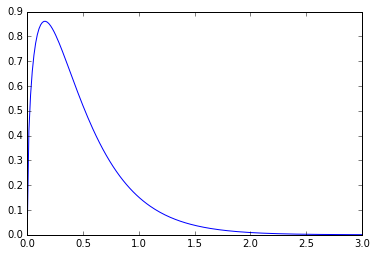

In [7]:
plot(t,FT)

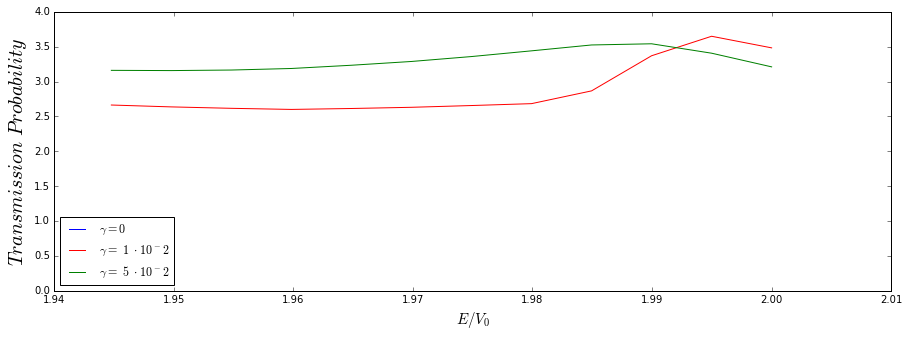

In [9]:
plot(E1,trans1[:,0],"b",label="$ \gamma=0 $")
plot(E1,trans1[:,1],"r",label="$ \gamma=\ 1\ \cdot 10^-2 $")
plot(E1,trans1[:,2],"g",label="$ \gamma=\ 5\ \cdot 10^-2 $")
#plot(E,abs(w),"-.k",label="$ \gamma=\ 0\ $")
xlabel("$ E/V_{0} $",size=15)
ylabel("$ Transmission\ Probability\ $", size=20)
legend(loc=3)
figsize(15,5)


### Ahora definiremos el tiempo tomado para cruzar la barrera $\omega_{d} $ 

# Abajo de la Barrera

## $ w =\frac{2  k\kappa e^{-ikd}}{  (k^2 - \kappa^2)\cdot i sinh(\kappa d) \quad - \quad 2k\kappa \cdot cosh(\kappa d)  } $ <--- Mirar si esta bien 

In [10]:
y1=sinh(t)
y2=cosh(t)


In [11]:
omega=np.linspace((-Vop+0.1)/(hbarc/c),(Vop-0.1)/(hbarc/c),T)#omega de la transformada

OMEGA=100# Omega de corte siendo mucho mayor que los gammas tomados

E2=np.linspace(0.1, 0.999 ,T) # Energias para arriba de la barrera E/Vop

trans2=zeros([len(E2),3]) #aqui seran guardadas las transformadas

for g in range(len(gamma)):
    
    sigma=sqrt(gamma[g]**2+(4.0*gamma[g]*OMEGA/pi)**2) #cambiando gamma
    
    FT=sqrt(2*t*exp(-(sigma-gamma[g])*t)) #definiendo la funcion sqrt(f(t))
    
    print gamma[g], "funcion F de t "
    
    for i in range(len(E2)): #variando la energia, punto por punto
        
        Vo=(Vop-(hbarc/c)*omega)/Vop # definiendo el cambio de potencial sobre Vop
        
        k=sqrt(2.0*m*Vop*E2[i])/hbarc
        
        kp=sqrt(2.0*m*Vop*(Vo-E2[i]))/hbarc #energia mayor a la energia del 
              
        w=(2*k*kp*exp(-im*k*d)) / ( (k**2 - kp**2)*im*sinh(kp*d) - 2*k*kp*cosh(kp*d)  ) #creando la funcion para un cierto E
  
        W=fft(w)#haciendo la transformada
        
        suma=0
        
        for l in range(len(t)):
                suma+=abs(dt*FT[l]*W[l])
            
        trans2[i,g]=suma**2
  
        
#freq=fftfreq(E.shape[-1])

0 funcion F de t 
0.01 funcion F de t 
0.05 funcion F de t 


/Users/daniellozano/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


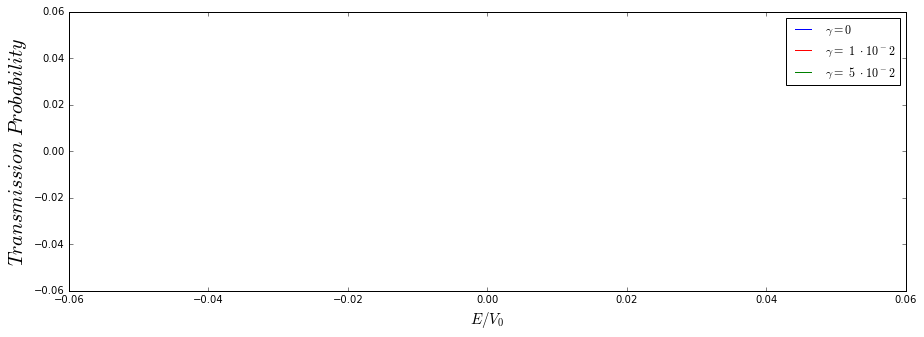

In [12]:
plot(E2,trans2[:,0],"b",label="$ \gamma=0 $")
plot(E2,trans2[:,1],"r",label="$ \gamma=\ 1\ \cdot 10^-2 $")
plot(E2,trans2[:,2],"g",label="$ \gamma=\ 5\ \cdot 10^-2 $")
#plot(E,abs(w),"-.k",label="$ \gamma=\ 0\ $")
xlabel("$ E/V_{0} $",size=15)
ylabel("$ Transmission\ Probability\ $", size=20)
legend(loc=1)
figsize(15,5)



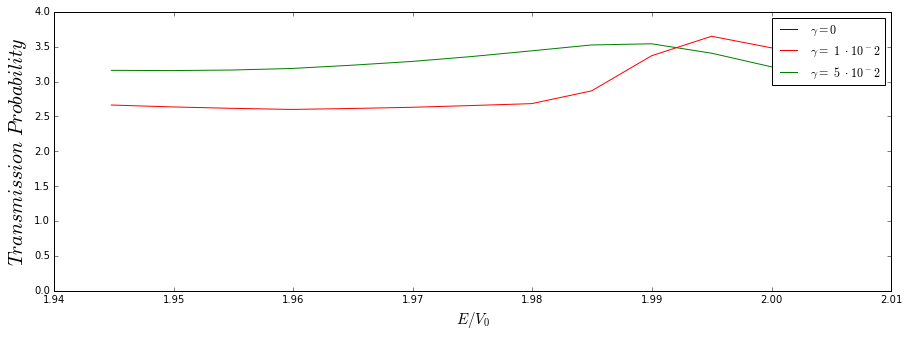

In [14]:
plot(E1,trans1[:,0],"b",label="$ \gamma=0 $")
plot(E1,trans1[:,1],"r",label="$ \gamma=\ 1\ \cdot 10^-2 $")
plot(E1,trans1[:,2],"g",label="$ \gamma=\ 5\ \cdot 10^-2 $")
plot(E2,trans2[:,0],"b")
plot(E2,trans2[:,1],"r")
plot(E2,trans2[:,2],"g")
xlabel("$ E/V_{0} $",size=15)
ylabel("$ Transmission\ Probability\ $", size=20)
legend(loc=1)
#ylim(-0.1*10**-13,2.5*10**-13)

figsize(15,5)
savefig("dissipation_tunneling.png")



# Ahora calcularemos el Tiempo de mora (Dwell time) dado por las siguientes expresiones

## $ F(t)=\frac{1}{w(E,V_{0})}\int_{-\infty}^{\infty}\frac{d\omega}{2\pi} e^{-i\omega t}w(E,V_{0}-\hbar \omega)  \\ F_{D}(t)=\frac{\sqrt{f(t)}F(t)}{\int_{0}^{\infty}\sqrt{f(t)}F(t)dt} \\ \langle\tau_{D}\rangle=\int_{0}^{\infty}t \cdot F_{D}(t)dt$

T=2000 
dt=1.0/T
Vop=1.8 # eV
hbarc=0.19733# ev Microm * c
m=0.511*10**6 # ev
d=20.8*10**-4 # Microm
c=2.998*10**14 # Microm/sec
im=complex(0,1) #definiendo i


In [17]:

omega=linspace(-0.5*Vop,0.5*Vop,T)#omega de la transformada
OMEGA=100# Omega de corte siendo mucho mayor que los gammas tomados

E1=np.linspace(0.01,0.99,T)# eV
t=np.linspace(0,2,T)#en un timepo grande
DTIME1=zeros([len(E1),len(gamma)])

#comienza el codigo
for g in range(len(gamma)):
    
    sigma=sqrt(gamma[g]**2+(4.0*gamma[g]*OMEGA/pi)**2) #cambiando gamma
    
    f_t=sqrt(2*t*exp(-(sigma-gamma[g])*t))#definiendo la funcion sqrt(f(t)), tamaño T
    
    
    for i in range(len(E1)):
     

        Vo=(Vop-hbarc*omega/c)/Vop #haciendo el cambio de variable con omega y normalizado por Vop
        
        k=sqrt(2.0*m*Vop*E1[i])/hbarc
        
        kp=sqrt(2.0*m*Vop*(Vo-E1[i]))/hbarc
        
        #w=-(2*im*k*kp*exp(-im*k*d)) / ( (k**2 + kp**2)*sin(kp*d) + 2*im*k*kp*cos(kp*d)  )# para la transformada
        w=(2*k*kp*exp(-im*k*d)) / ( (k**2 - kp**2)*im*sinh(kp*d) - 2*k*kp*cosh(kp*d)  ) #creando la funcion para un cierto E
  
        
            
        ################################################
        
        kpp=sqrt(2.0*m*Vop*(1-E1[i]))/hbarc #sin transformada
        
        wp=-(2*im*k*kpp*exp(-im*k*d)) / ( (k**2 + kpp**2)*sin(kpp*d) + 2*im*k*kpp*cos(kpp*d)  )
        
        w=(2*k*kpp*exp(-im*k*d)) / ( (k**2 - kpp**2)*im*sinh(kpp*d) - 2*k*kp*cosh(kpp*d)  ) #creando la funcion para un cierto E
  
    
        w_f=fft(w)

        F_T=w_f/wp #aqui esta la funcion F sin dissipacion--------
        
        suma=0

        for j in range(len(t)):
            suma+=f_t[j]*F_T[j]*dt
        
        F_D_T=F_T*f_t/suma#aqui tenemos la funcion F con disipacion
        
        suma1=0
        
        for j in range(len(t)):
            suma1+=dt*F_D_T[j]*t[j]
        DTIME1[i][g]=suma1    #aqui obtendriamos el tiempo de mora
        




/Users/daniellozano/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: ComplexWarning: Casting complex values to real discards the imaginary part


Max t= 2.0


/Users/daniellozano/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 0.5)

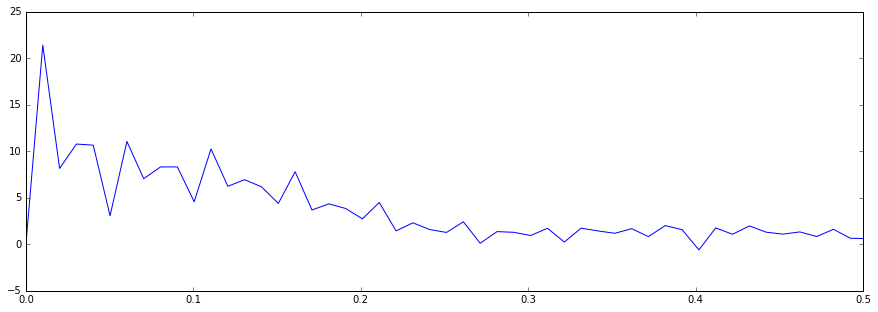

In [18]:
plot(t,F_D_T)
print "Max t=",max(t)
xlim(0,0.5)


/Users/daniellozano/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


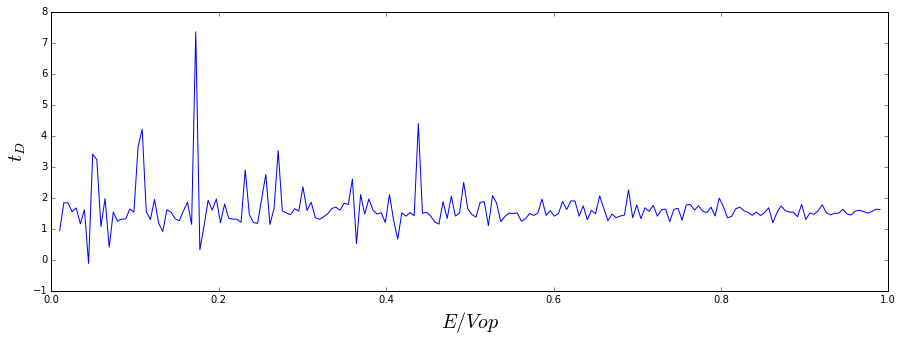

In [19]:
plot(E1,DTIME1[:,1])
xlabel("$ E/Vop $",size=20)
ylabel("$ t_{D} $",size=20)
legend()

In [20]:
E1=0.5
print hbarc, c
omega=linspace(-0.5*Vop,0.5*Vop,T)#omega de la transformada

Vo=(Vop-hbarc*omega/c)/Vop

k=sqrt(2.0*m*Vop*E1)/hbarc
        
kp=sqrt(2.0*m*Vop*(Vo-E1))/hbarc

w=(2*k*kp*exp(-im*k*d)) / ( (k**2 - kp**2)*im*sinh(kp*d) - 2*k*kp*cosh(kp*d)  ) #creando la funcion para un cierto E
  


0.19733 2.998e+14


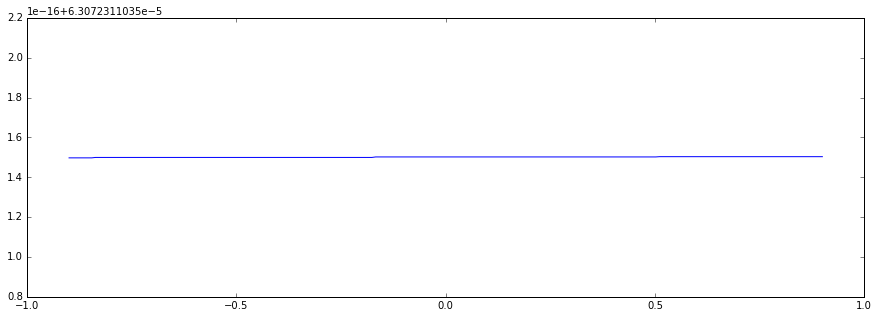

In [21]:
plot(omega,w.real)